# Exercises (with solutions)


In [1]:
import numpy as np

from astropy import table
from astropy.table import Table

%matplotlib inline
from matplotlib import pyplot as plt

### Read the data

To start with, read in the two data files representing the master source list and observations source list.  The fields for the two tables are respectively documented in:

- [master_sources](http://cxc.harvard.edu/csc/columns/master.html)
- [obs_sources](http://cxc.harvard.edu/csc/columns/persrc.html)

In [2]:
master_sources = Table.read('cdfs_master_sources.fits')
obs_sources = Table.read('cdfs_obs_sources.fits')

**`master_sources`**

Each distinct X-ray source identified on the sky is represented in the catalog by a single "master source" entry and one or more "source observation" entries, one for each observation in which the source has been detected. The master source entry records the best estimates of the properties of a source, based on the data extracted from the set of observations in which the source has been detected.  The subset of fields in our exercise table file are:

Name | Description
------ | ------------
msid  | Master source ID
name  | Source name in the Chandra catalog
ra  | Source RA (deg)
dec | Source Dec (deg)

**`obs_sources`**

The individual source entries record all of the properties about a detection extracted from a single observation, as well as associated file-based data products, which are observation-specific.  The subset of fields in our exercise table file are:

Name | Description
------ | ------------
obsid | Observation ID
obi | Observation interval
targname | Target name
gti_obs | Observation date
flux_aper_b | Broad band (0.5 - 7 keV) flux (erg/cm2/sec)
src_cnts_aper_b | Broad band source counts
ra_b | Source RA (deg)
dec_b | Source Dec (deg)
livetime | Observation duration (sec)
posid | Position ID
theta | Off-axis angle (arcmin)
msid | Master source ID

### Exploring the data
Do the following to explore the two tables:

- Display the data for each table in IPython notebook using the normal way of showing the value of a variable.
- Get a list of the column names for each table.  *Hint*: use `<TAB>` completion to easily discover all the attributes and methods, e.g. type `master_sources.` and then hit the `<TAB>` key.
- Find the length of each table.
- Find the column datatypes for each table.

Normally one displays a table in IPython notebook by entering the variable name in a cell and pressing `shift-Enter`.  In a terminal session the default method is using something like `print(my_table)`.  In both cases the `Table` object prefers to display only a screenful of data to prevent having a zillion lines of output if the table is huge.  If you really want to see all the data you can use the [Table.pprint](http://astropy.readthedocs.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.pprint) method. If you are using a Jupyter notebook interface, try the `show_in_notebook()` method.

- Display all the rows of the `master_sources` table using its `pprint()` method.
- If you are working in a regular terminal window (not IPython notebook), try the `more()` method as well.

In [3]:
master_sources.pprint()

 msid          name              ra          dec     
------ -------------------- ------------ ------------
 11567 CXO J033206.1-275449  03 32 06.10 -27 54 49.73
 11570 CXO J033151.1-275051  03 31 51.15 -27 50 51.66
 11574 CXO J033236.1-275126  03 32 36.19 -27 51 26.87
 11576 CXO J033253.0-275138  03 32 53.09 -27 51 38.28
 11580 CXO J033213.4-274856  03 32 13.44 -27 48 56.20
 11586 CXO J033218.8-275136  03 32 18.86 -27 51 36.08
 11595 CXO J033244.3-275141  03 32 44.32 -27 51 41.71
 11600 CXO J033234.7-275535  03 32 34.74 -27 55 35.82
 11692 CXO J033153.4-274843  03 31 53.49 -27 48 43.92
 11788 CXO J033202.2-275234  03 32 02.29 -27 52 34.42
   ...                  ...          ...          ...
 33232 CXO J033225.9-274514  03 32 25.96 -27 45 14.82
 33233 CXO J033230.0-274404  03 32 30.01 -27 44 04.50
 33234 CXO J033237.4-274000  03 32 37.44 -27 40 00.74
 33235 CXO J033149.4-275034  03 31 49.46 -27 50 34.20
 33236 CXO J033149.4-274634  03 31 49.45 -27 46 34.46
 33239 CXO J033222.7-275224 

In [4]:
obs_sources.show_in_notebook()

idx,obsid,obi,targname,gti_obs,flux_aper_b,src_cnts_aper_b,ra_b,dec_b,livetime,posid,theta,msid
0,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,1.016e-14,53.492,03 32 50.25,-27 52 52.60,55967.0,14983,6.883,33150
1,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,1.64e-14,112.29,03 32 37.77,-27 52 12.63,55967.0,14984,4.569,33164
2,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,6.472e-15,43.247,03 32 43.22,-27 49 14.77,55967.0,14985,3.723,33183
3,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,1.304e-14,69.774,03 32 59.85,-27 47 48.72,55967.0,14986,7.302,33198
4,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,8.389e-14,594.61,03 32 08.67,-27 47 34.83,55970.2,14987,4.101,33202
5,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,1.58e-14,90.888,03 32 29.98,-27 45 30.40,55967.0,14988,2.897,33140
6,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,3.81e-15,24.617,03 32 30.22,-27 45 05.34,55967.0,14989,3.315,33142
7,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,9.992e-15,73.295,03 32 10.93,-27 44 15.50,55967.0,14990,5.386,33143
8,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,1.427e-14,100.45,03 32 36.71,-27 44 06.83,55967.0,14991,4.735,33144
9,441,0,AXAF Southern Deep Field - ACIS-I,2000-05-27T01:32:52,6.375e-15,59.919,03 32 10.52,-27 43 09.67,55967.0,14992,6.308,33145


### Modifying tables
For our analysis we don't actually need the `obi` (observation interval) column in the `obs_sources` table.

- Remove the `obi` column from the `obs_sources` table.

The `gti_obs` column name is a bit obscure (GTI is a good time interval, FWIW).

- Rename the `gti_obs` column to `obs_date`.

It would be nice to have a count rate in addition to the source counts.

- Add a new column `src_rate_aper_b` which is the source counts divided by observation duration in sec.

Some of the sources have a negative net flux in the broad band

In [5]:
obs_sources.remove_column('obi')

In [6]:
obs_sources.rename_column("gti_obs", "obs_date")

In [7]:
obs_sources['src_rate_aper_b'] = obs_sources['src_cnts_aper_b'] / obs_sources['livetime']

### Looking at the observation source data
For each source detected in an individual observation (in the `obs_sources` table), let's look at the source flux values.

- Use the matplotlib [`hist()`]( http://matplotlib.org/api/pyplot_api.html?highlight=pyplot.hist#matplotlib.pyplot.hist) function to make a histogram of the source fluxes.  Since the fluxes vary by orders of magnitude,
  use the `numpy.log10` to put the fluxes in log space.

- Also make the same plot but using only sources within 4 arcmin of the center.  *HINT*: use a boolean mask to select values of `theta` that are less than 4.0.

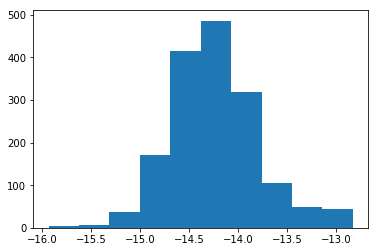

In [8]:
plt.figure()
plt.hist(np.log10(obs_sources['flux_aper_b']))
plt.show()

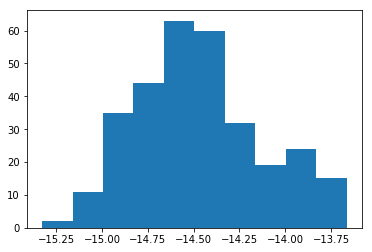

In [9]:
mask = obs_sources['theta'] < 4.0
plt.figure()
plt.hist(np.log10(obs_sources[mask]['flux_aper_b']))
plt.show()

### Join the master_sources and obs_sources tables

The `master_sources` and `obs_sources` tables share a common `msid` column. What we now want is to join the master RA and Dec positions and master source names with the individual observations table.

- Use the [table.join()](http://astropy.readthedocs.org/en/stable/table/operations.html#join) function to make a single table called `sources` that has the master RA, Dec, and name included for each observation source.

*HINT*: the defaults for `keys` and `join_type='inner'`  are correct in this case, so the simplest possible call to `join()` will work!

- *Intermediate*: Is the length of the new `sources` the same as `obs_sources`?  What happened?

- *Advanced*: Make a scatter plot of the RA (x-axis) and Dec (y-axis) difference between the master source position and the observation source position.  You'll need to use `coordinates`!

In [10]:
sources = table.join(master_sources, obs_sources, join_type='inner')
len(sources), len(master_sources), len(obs_sources)

(1555, 209, 1637)

In [11]:
sources.colnames

['msid',
 'name',
 'ra',
 'dec',
 'obsid',
 'targname',
 'obs_date',
 'flux_aper_b',
 'src_cnts_aper_b',
 'ra_b',
 'dec_b',
 'livetime',
 'posid',
 'theta',
 'src_rate_aper_b']

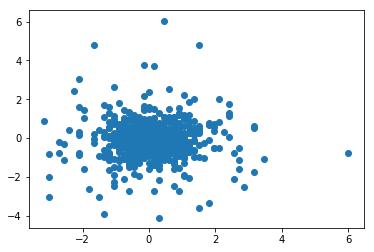

In [12]:
from astropy.coordinates import SkyCoord
import astropy.units as u

src_coord = SkyCoord(ra=sources['ra'], dec=sources['dec'], unit=(u.hourangle, u.deg))
obs_coord = SkyCoord(ra=sources['ra_b'], dec=sources['dec_b'], unit=(u.hourangle, u.deg))
d_ra = src_coord.ra - obs_coord.ra
d_dec = src_coord.dec - obs_coord.dec

# convert degrees to arcsec
plt.scatter(d_ra.arcsec, d_dec.arcsec)

### Grouped properties of `sources`

Finally, we can look at the variability properties of sources in the CDFS using the [`group_by()`](http://astropy.readthedocs.org/en/stable/table/operations.html#id2) functionality.  

This method makes a new table in which all the sources with identical master ID are next to each other.

- Make a new table `g_sources` which is the `sources` table grouped by the `msid` key using the `group_by()` method.

The `g_sources` table is just a regular table with all the `sources` in a particular order.  The attribute `g_sources.groups` is an object that provides access to the `msid` sub-groups.  You can access the $i^{th}$ group with `g_sources.groups[i]`.

In addition the `g_sources.groups.indices` attribute is an array with the indicies of the group boundaries.

- Using `np.diff()` find the number of repeat observations of each master sources.  *HINT*: use the indices, Luke.
- Print the 50th group and note which columns are the same for all group members and which are different.  Does this make sense?  In these few observations how many different target names were provided by observers?

In [13]:
g_sources = sources.group_by('msid')

In [14]:
np.diff(g_sources.groups.indices)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  3,  1,  1,  2,  1,  1,  1,
        1,  3,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  4,  2,  1, 18,  5,
        4,  9, 11,  3,  7,  2,  2,  1,  1,  1,  2,  1, 14,  7, 15,  1, 10,
       12,  2,  2,  1,  1,  2, 17, 18,  5, 21, 21, 14, 15, 18,  4, 12, 16,
       21, 16, 21, 21, 21, 21, 20, 19, 21, 21, 21, 18, 21, 21, 20, 11, 20,
       14, 21,  8, 13,  6, 16, 18, 21, 11, 20, 14, 21, 11, 14, 21,  7,  7,
       13, 21, 21, 14,  5, 11,  6, 14,  7, 20, 18, 13,  6, 19, 20, 20, 21,
       11, 17,  6, 17,  9, 17, 10, 21,  8,  4,  7, 21, 20, 13,  6, 12,  8,
       10,  4,  5,  5,  2,  4,  4, 11,  3,  4,  6,  6,  5,  3, 14,  9, 16,
        3,  2,  1,  5,  5,  7,  1,  5,  1,  1,  3, 15])

In [15]:
g_sources.groups[50]

msid,name,ra,dec,obsid,targname,obs_date,flux_aper_b,src_cnts_aper_b,ra_b,dec_b,livetime,posid,theta,src_rate_aper_b
int64,str20,str12,str12,int64,str50,str19,float64,float64,str12,str12,float64,int64,float64,float64
31719,CXO J033258.4-275007,03 32 58.48,-27 50 07.48,2405,AXAF SOUTHERN DEEP F,2000-12-11T08:24:19,1.994e-15,17.255,03 32 58.51,-27 50 07.28,59629.5,15119,6.712,0.000289370194283
31719,CXO J033258.4-275007,03 32 58.48,-27 50 07.48,582,AXAF Southern Deep Field,2000-06-03T02:59:50,4.272e-15,24.844,03 32 58.48,-27 50 09.86,130584.4,15461,7.209,0.000190252434441
31719,CXO J033258.4-275007,03 32 58.48,-27 50 07.48,8596,Chandra Deep Field-South,2007-10-24T13:44:48,6.401e-16,15.749,03 32 58.29,-27 50 04.95,115110.3,17863,6.605,0.000136816601121
31719,CXO J033258.4-275007,03 32 58.48,-27 50 07.48,8595,Chandra Deep Field-South,2007-10-19T14:33:54,1.342e-15,22.475,03 32 58.50,-27 50 07.45,115413.1,17633,6.731,0.000194735259689
31719,CXO J033258.4-275007,03 32 58.48,-27 50 07.48,8594,Chandra Deep Field-South,2007-11-01T12:10:52,2.264e-15,23.458,03 32 58.54,-27 50 07.08,141397.4,44590,6.607,0.000165901211762


### Aggregation

The real power of grouping comes in the ability to create aggregate values for each of the groups, for instance the mean flux for each unique source.  This is done with the [`aggregate()`](http://astropy.readthedocs.org/en/stable/table/operations.html#aggregation) method, which takes a function reference as its input.  This function must take as input an array of values and return a single value.

Aggregate returns a new table that has a length equal to the number of groups.

- Compute the mean of all columns for each unique source (i.e. each group) using `aggregate` and the `np.mean` function.  Call this table `g_sources_mean`.
- Notice that aggregation cannot form a mean for certain columns and these are dropped from the output.  Use the `join()` function to restore the `master_sources` information to `g_sources_mean`.

In [16]:
g_sources_mean = table.join(g_sources.groups.aggregate(np.mean), master_sources, keys=['msid'], join_type='inner')
g_sources_mean

msid,obsid,flux_aper_b,src_cnts_aper_b,livetime,posid,theta,src_rate_aper_b,name,ra,dec
int64,float64,float64,float64,float64,float64,float64,float64,str20,str12,str12
11567,582.0,4.84e-15,35.507,130584.4,15460.0,7.987,0.00027190843623,CXO J033206.1-275449,03 32 06.10,-27 54 49.73
11570,582.0,5.134e-15,55.591,130584.4,15468.0,8.321,0.000425709349662,CXO J033151.1-275051,03 31 51.15,-27 50 51.66
11574,582.0,1.371e-15,17.829,130584.4,15498.0,3.743,0.000136532388249,CXO J033236.1-275126,03 32 36.19,-27 51 26.87
11576,582.0,1.136e-15,10.197,130584.4,15502.0,6.666,7.80874285137e-05,CXO J033253.0-275138,03 32 53.09,-27 51 38.28
11580,582.0,2.37e-15,16.011,130584.4,15509.0,3.057,0.000122610357746,CXO J033213.4-274856,03 32 13.44,-27 48 56.20
11586,582.0,2.092e-15,15.765,130584.4,15382.0,3.75,0.000120726518635,CXO J033218.8-275136,03 32 18.86,-27 51 36.08
11595,582.0,9.126e-16,25.018,130584.4,15418.0,5.117,0.000191584906007,CXO J033244.3-275141,03 32 44.32,-27 51 41.71
11600,582.0,3.446e-15,23.171,130584.4,15431.0,7.488,0.00017744079691,CXO J033234.7-275535,03 32 34.74,-27 55 35.82
11692,1672.0,2.476e-15,17.303,95138.1,15596.0,7.792,0.000181872456986,CXO J033153.4-274843,03 31 53.49,-27 48 43.92


[Back to top](#Tables-introduction)